## Plotting

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.1.1'

## Load a well and add deviation and a striplog

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [3]:
from welly import Well

In [5]:
w = Well.from_las('P-130_out.LAS')

Load a deviation survey.

In [6]:
dev = np.loadtxt('P-130_deviation_survey.csv', delimiter=',', skiprows=1)
w.location.add_deviation(dev[:, :3], td=2618.3)
w.location.md2tvd(2000)

array(1998.1795053338706)

Add a striplog.

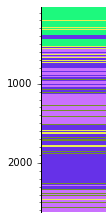

In [7]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('P-130_25_2618.png', 25, 2618, legend=legend)
strip.plot(aspect=2)

In [8]:
w.data['strip'] = strip

## Basic plot

We want to use a legend so we get the striplog to look right:

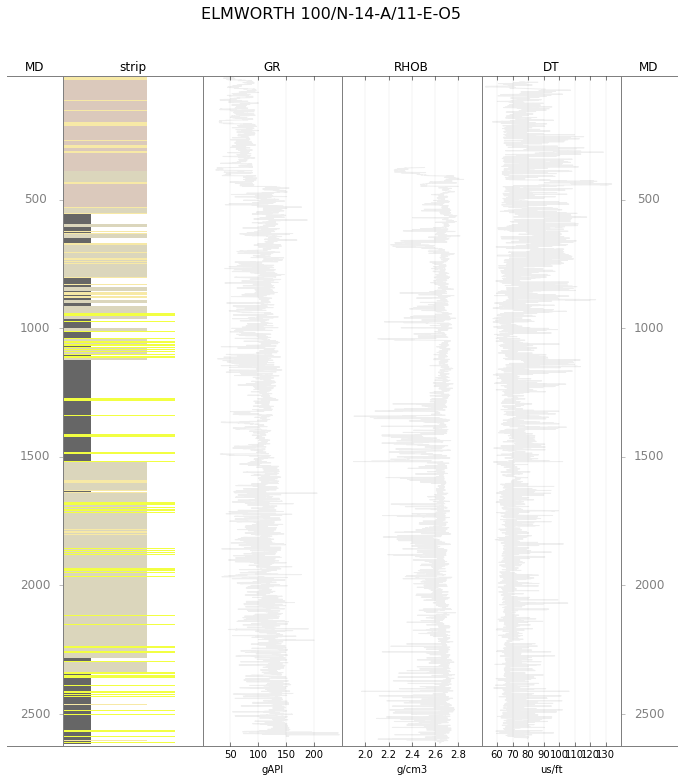

In [9]:
tracks = ['MD', 'strip', 'GR', 'RHOB', ['DT', 'DTS'], 'MD']
w.plot(tracks=tracks, legend=legend)

The legend doesn't have entries for the curves, so they are grey. 

Let's add some.

In [10]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#ff0000,2.0,linear,GR
#000000,2.0,log,RHOB
#00ff00,2.0,linear,DT
#ffff00,3.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)

In [11]:
complete_legend = legend + curve_legend

In [12]:
complete_legend[:5]

Legend(Decor({'colour': '#f7e9a6', 'hatch': None, 'component': Component({'colour': 'grey', 'lithology': 'sandstone', 'grainsize': 'vf-f'}), 'width': 3.0})
Decor({'colour': '#ff99cc', 'hatch': None, 'component': Component({'colour': '', 'lithology': 'anhydrite', 'grainsize': ''}), 'width': 2.0})
Decor({'colour': '#dbd6bc', 'hatch': None, 'component': Component({'colour': 'grey', 'lithology': 'heterolithic', 'grainsize': ''}), 'width': 3.0})
Decor({'colour': '#ff4c4a', 'hatch': None, 'component': Component({'colour': '', 'lithology': 'volcanic', 'grainsize': ''}), 'width': 2.0})
Decor({'colour': '#86f0b6', 'hatch': None, 'component': Component({'colour': '', 'lithology': 'conglomerate', 'grainsize': ''}), 'width': 5.0}))

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


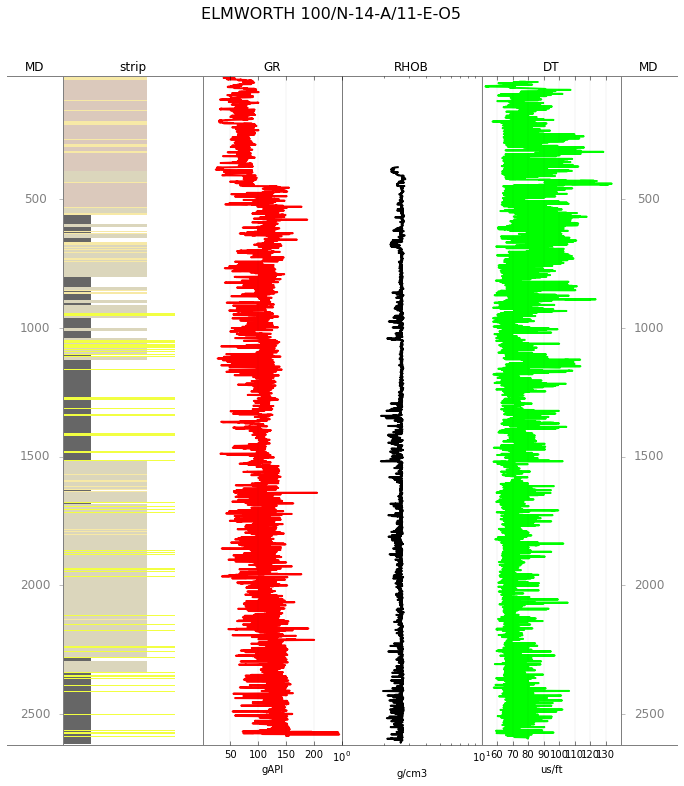

In [13]:
w.plot(tracks=tracks, legend=complete_legend)

## 2D log plot

A variable density display.

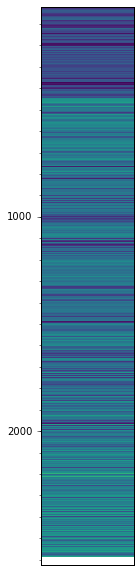

In [14]:
w.data['GR'].plot_2d(cmap='viridis')